<h1>Zadanie 3</h1>

Wczytywanie bibliotek

In [1]:
%matplotlib ipympl
from matplotlib.widgets import SpanSelector, CheckButtons, Button, TextBox
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

<h3>1</h3>
Wczytywanie i wyswietlanie sygnału ekg100.txt

In [2]:
def readFile(filename):
    global ekg
    try:
        with open(filename, 'r') as file:
            ekg = file.read()

    except FileNotFoundError:
        print(f"Plik {filename} nie został znaleziony.")
    except Exception as e:
        print(f"Wystąpił błąd podczas wczytywania pliku {filename}: {e}")


In [3]:
readFile("ekg100.txt")
signals = np.array([list(map(float, line.split())) for line in ekg.split("\n")])

f = 360
x = np.arange(1, len(signals) + 1) / f
y = signals.T[0]

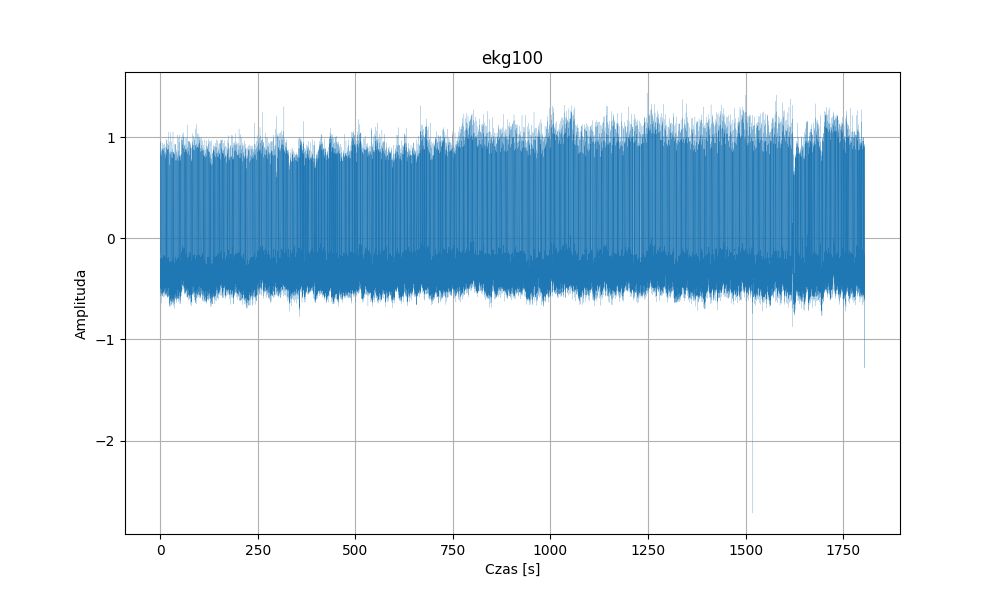

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=0.1)
plt.title('ekg100')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

<h3>2</h3>
Wyznaczanie transwormacji fouriera i wyswietlanie widma

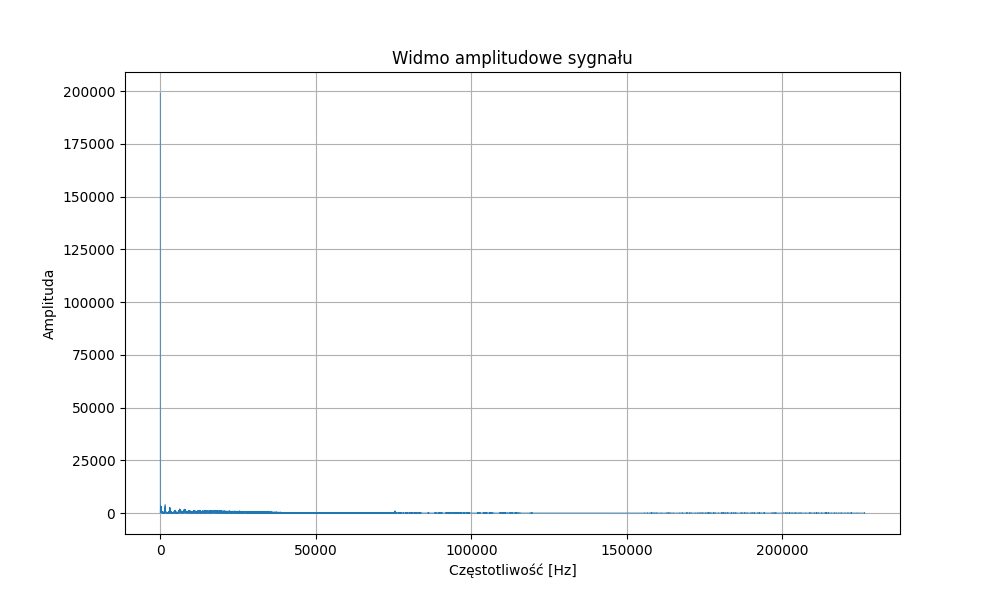

In [5]:
dft = np.fft.fft(y)

N = len(y)
tmax = max(y)
freq = np.fft.fftfreq(len(y), tmax/N)



# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft[:len(freq)//2]), lw=0.5)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo amplitudowe sygnału')
plt.grid(True)
plt.show()

<h3>3</h3>
Wyznaczanie odwrotnej dyskretnej transwormaty Fouriera

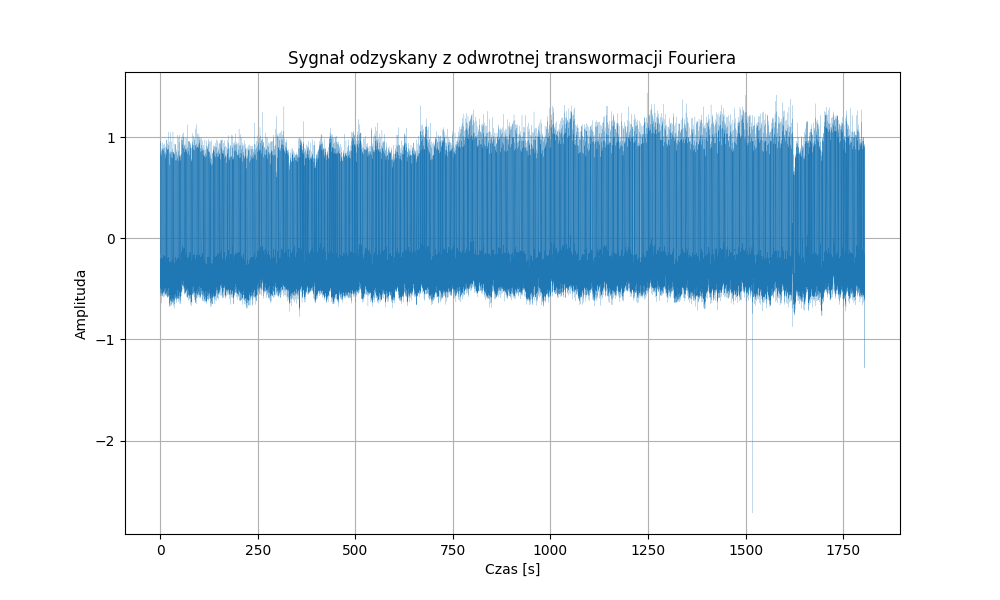

In [6]:
orgSignal = np.fft.ifft(dft)


plt.figure(figsize=(10, 6))
plt.plot(x, orgSignal.real, lw=0.1)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Sygnał odzyskany z odwrotnej transwormacji Fouriera')
plt.grid(True)
plt.show()

Obliczanie rożnicy sygnałów

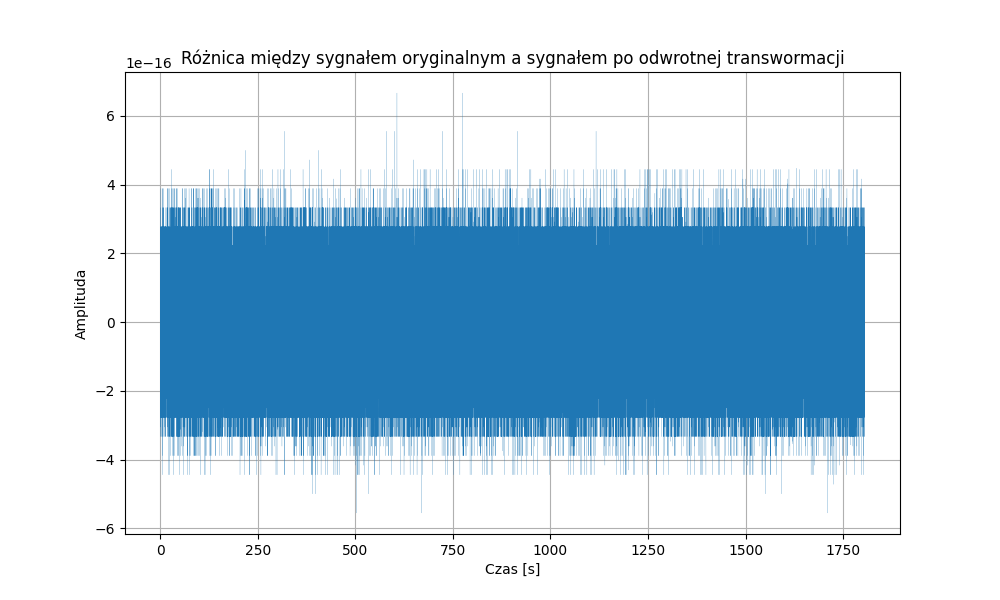

In [7]:
diff = y - orgSignal

plt.figure(figsize=(10, 6))
plt.plot(x, diff.real, lw=0.1)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Różnica między sygnałem oryginalnym a sygnałem po odwrotnej transwormacji')
plt.grid(True)
plt.show()